## Sentiment Analysis of reviews from Healthcare Industry

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
# import dataset
dataset = pd.read_csv('dataset.csv')

In [2]:
# Lets see how our dataset looks
# Dimensionality of the DataFrame-shape
print(dataset.shape)
# First few rows of our dataset
print(dataset.head())
# Full summary of the dataframe
print(dataset.info())
# Descriptive statistics of the dataframe
print(dataset.describe(include="all"))
# Rating counts
print(dataset['Rating'].value_counts())
print(dataset['Company'].value_counts())

(1127, 4)
   Unnamed: 0                                            Reviews  Rating  \
0           0  Humana offers so much more than just medical c...       5   
1           1  For the most part I am satisfied with my healt...       4   
2           2  Humana has included very good insurance suppor...       4   
3           3  So I got this insurance about 28 days ago. I d...       5   
4           4  I have had Humana for my Medicare part D progr...       5   

  Company  
0  Humana  
1  Humana  
2  Humana  
3  Humana  
4  Humana  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 4 columns):
Unnamed: 0    1127 non-null int64
Reviews       1127 non-null object
Rating        1127 non-null int64
Company       1127 non-null object
dtypes: int64(2), object(2)
memory usage: 35.3+ KB
None
         Unnamed: 0 Reviews       Rating             Company
count   1127.000000    1127  1127.000000                1127
unique          NaN    1125          Na

In [3]:
# Adding text-length as a field in the dataset
dataset['text length'] = dataset['Reviews'].apply(len)
print(dataset.head())

   Unnamed: 0                                            Reviews  Rating  \
0           0  Humana offers so much more than just medical c...       5   
1           1  For the most part I am satisfied with my healt...       4   
2           2  Humana has included very good insurance suppor...       4   
3           3  So I got this insurance about 28 days ago. I d...       5   
4           4  I have had Humana for my Medicare part D progr...       5   

  Company  text length  
0  Humana          387  
1  Humana          421  
2  Humana          477  
3  Humana          423  
4  Humana          439  


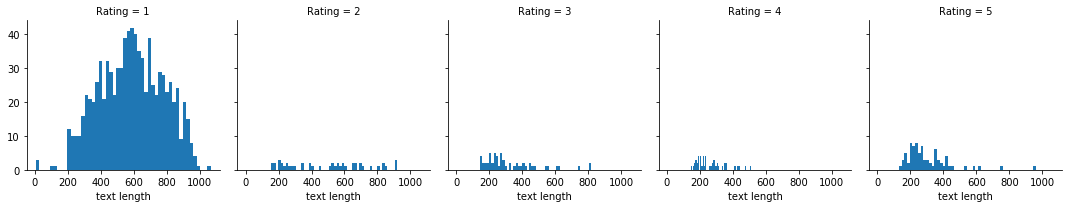

In [4]:
#Basic visualization of data using histograms
graph = sns.FacetGrid(data=dataset, col='Rating')
graph.map(plt.hist, 'text length', bins=50)

- a.	Distribution of text-length doesn’t seem to be similar across all five ratings
- b.	Number of text-reviews seem to be skewed a lot higher towards the 1-star & 5-star rating than compared to others


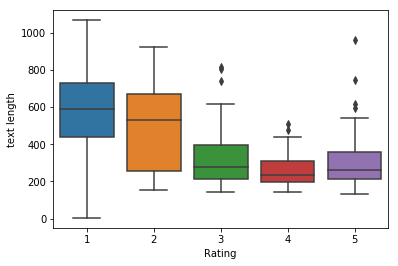

In [5]:
# Box-plot visvualization
sns.boxplot(x='Rating', y='text length', data=dataset)

c.From the box-plot, looks like the 1-star and 2-star ratings have much longer text. There are also outliers present for rating-3,4,5 so text-length won’t be a useful feature to consider.

In [6]:
# Let us only grab the reviews with 1 star or 5 star
dataset_class = dataset[(dataset['Rating'] == 1) | (dataset['Rating'] == 5)]
print(dataset_class.shape)
print(dataset_class.head())

(973, 5)
   Unnamed: 0                                            Reviews  Rating  \
0           0  Humana offers so much more than just medical c...       5   
3           3  So I got this insurance about 28 days ago. I d...       5   
4           4  I have had Humana for my Medicare part D progr...       5   
5           5  I have had Humana Dental several months now, p...       1   
6           6  Last week I had Roux-en-Y gastric bypass surge...       1   

  Company  text length  
0  Humana          387  
3  Humana          423  
4  Humana          439  
5  Humana          695  
6  Humana          281  


## Text Pre-Processing

In [7]:
# store the reviews & ratings in two separate lists
classes=dataset_class['Rating']
text_messages=dataset_class['Reviews']
print(text_messages[0:6],"\n",classes[0:6])

0    Humana offers so much more than just medical c...
3    So I got this insurance about 28 days ago. I d...
4    I have had Humana for my Medicare part D progr...
5    I have had Humana Dental several months now, p...
6    Last week I had Roux-en-Y gastric bypass surge...
7    My wife has been diagnosed with cancer. She ha...
Name: Reviews, dtype: object 
 0    5
3    5
4    5
5    1
6    1
7    1
Name: Rating, dtype: int64


In [8]:
# Convert the classes into binary format : Rating 5="1"  ,  Rating 1="0"
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(classes)  #new class variable
company_name=list(dataset_class['Company'])
print(Y[0:6])
print(type(company_name))

[1 1 1 0 0 0]
<class 'list'>


In [9]:
# Use Regular Expressions to replace email addresses,symbols,phone nos,urls etc

# replacing email addresses with emailaddr
processed=text_messages.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddr')
# replacing urls with webaddress
processed=processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
# replace money symbols with moneysymb
processed=processed.str.replace(r'£|\$','moneysymb')
# replace phone numbers with phonenumb
processed=processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumbr')
# replace normal numbers with numbr
processed=processed.str.replace(r'\d+(\.\d+)?','numbr')
# remove punctuation
processed=processed.str.replace(r'[^\w\d\s]', ' ')
# remove whitespace with a single space
processed=processed.str.replace(r'\s+', ' ')
# remove leading and trailing whitespace
processed=processed.str.replace(r'^\s+|\s+?$','')
#convert text to lowercase
processed=processed.str.lower()

print(processed[0:6])

0    humana offers so much more than just medical c...
3    so i got this insurance about numbr days ago i...
4    i have had humana for my medicare part d progr...
5    i have had humana dental several months now pa...
6    last week i had roux en y gastric bypass surge...
7    my wife has been diagnosed with cancer she had...
Name: Reviews, dtype: object


In [10]:
# Remove Stopwords, Lemmatization
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
processed=processed.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [11]:
# Remove word stems-Lemmatizing procedure using WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
ls = WordNetLemmatizer()
processed=processed.apply(lambda x: ' '.join(ls.lemmatize(term) for term in x.split()))

print(processed[0:6])

0    humana offer much medical coverage many differ...
3    got insurance numbr day ago careful research l...
4    humana medicare part program happier keep mind...
5    humana dental several month paying close money...
6    last week roux en gastric bypass surgery docto...
7    wife diagnosed cancer appointment two differen...
Name: Reviews, dtype: object


In [12]:
# Finding the most common and rare words
common= pd.Series(' '.join(processed).split()).value_counts()[0:15]
print(common)
rare= pd.Series(' '.join(processed).split()).value_counts()[-10:]
print(rare)

numbr        1874
insurance     623
get           474
time          421
humana        420
pay           412
company       397
health        397
care          381
month         378
plan          378
doctor        371
year          366
call          353
blue          348
dtype: int64
blind        1
iola         1
retainer     1
guilty       1
candidate    1
meaning      1
blocking     1
property     1
xifaxan      1
ocd          1
dtype: int64


In [13]:
# Representation of bag-of-words model
from nltk.tokenize import word_tokenize
all_words=[]
for message in processed:
    words=word_tokenize(message)
    for w in words:
        all_words.append(w)
all_words=nltk.FreqDist(all_words)
#for key,val in all_words.items():
    #print (str(key) + ':' + str(val))

In [14]:
# create a new dataset with the processed reviews and corresponding encoded rating for feature extraction 
new_data={'Reviews':processed,
             'Rating':Y,
          'Company':company_name
         }
final=pd.DataFrame(new_data)
print(final.head())

                                             Reviews  Rating Company
0  humana offer much medical coverage many differ...       1  Humana
3  got insurance numbr day ago careful research l...       1  Humana
4  humana medicare part program happier keep mind...       1  Humana
5  humana dental several month paying close money...       0  Humana
6  last week roux en gastric bypass surgery docto...       0  Humana


In [15]:
import nltk

In [16]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\NAKUL
[nltk_data]     LAKHOTIA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Feature Engineering

In [17]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
final["sentiments"] = final["Reviews"].apply(lambda x: sid.polarity_scores(x))
final = pd.concat([final.drop(['sentiments'], axis=1), final['sentiments'].apply(pd.Series)], axis=1)
print(final.head())
print(final.shape)

                                             Reviews  Rating Company    neg  \
0  humana offer much medical coverage many differ...       1  Humana  0.000   
3  got insurance numbr day ago careful research l...       1  Humana  0.065   
4  humana medicare part program happier keep mind...       1  Humana  0.030   
5  humana dental several month paying close money...       0  Humana  0.216   
6  last week roux en gastric bypass surgery docto...       0  Humana  0.218   

     neu    pos  compound  
0  0.782  0.218    0.7964  
3  0.687  0.248    0.8779  
4  0.630  0.339    0.9217  
5  0.629  0.155   -0.6369  
6  0.782  0.000   -0.7783  
(973, 7)


Vader is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into account the context of the sentences to determine the sentiment scores. For each text, Vader returns 4 polarity scores:

a neutrality score,
a positivity score,
a negativity score,
an overall score that summarizes the previous scores.
These four columns become features in our dataset
VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

Positive Sentiment (compound score >=0.05)
Neutral Sentiment (compound score >-0.05 & <0.05)
Negative Sentiment (compound score <=-0.05)


In [18]:
# including metrics like word count and character count 
final['word_count'] = final['Reviews'].apply(lambda x: len(str(x).split(" ")))
final['char_count'] = final['Reviews'].apply(lambda x:len(str(x))) ## this also includes spaces
print(final.head())

                                             Reviews  Rating Company    neg  \
0  humana offer much medical coverage many differ...       1  Humana  0.000   
3  got insurance numbr day ago careful research l...       1  Humana  0.065   
4  humana medicare part program happier keep mind...       1  Humana  0.030   
5  humana dental several month paying close money...       0  Humana  0.216   
6  last week roux en gastric bypass surgery docto...       0  Humana  0.218   

     neu    pos  compound  word_count  char_count  
0  0.782  0.218    0.7964          32         223  
3  0.687  0.248    0.8779          45         273  
4  0.630  0.339    0.9217          36         234  
5  0.629  0.155   -0.6369          66         460  
6  0.782  0.000   -0.7783          31         219  


We also add word count and character count as features in our refined dateset

In [19]:
import gensim

In [20]:
# create doc2vec vector columns
# Initialize and train the model
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final["Reviews"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = final["Reviews"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
final = pd.concat([final, doc2vec_df], axis=1)
print(type(final))

C:\Users\NAKUL LAKHOTIA\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


<class 'pandas.core.frame.DataFrame'>


Doc2Vec (the portion of gensim that implements the Doc2Vec algorithm) does a great job at word embedding, but a terrible job at reading in files. It only takes in LabeledLineSentence classes which basically yields LabeledSentence, a class from gensim.models.doc2vec representing a single sentence. 

Word2Vec simply converts a word into a vector.

Doc2Vec not only does that, but also aggregates all the words in a sentence into a vector. To do that, it simply treats a sentence label as a special word, and does some operation on that special word. Hence, that special word is a label for a sentence.
Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec). Same texts will also have similar representations and that is why we can use those vectors as training features.

We first have to train a Doc2Vec model by feeding in our text data. By applying this model on our reviews, we can get those representation vectors.

In [21]:
print(len(documents))

973


In [22]:
print(model)

Doc2Vec(dm/m,d5,n5,w2,s0.001,t4)


In [23]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
# min_df = minimum document frequency
tfidf_result = tfidf.fit_transform(final["Reviews"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = final.index
final = pd.concat([final, tfidf_df], axis=1)
print(final.head())

                                             Reviews  Rating Company    neg  \
0  humana offer much medical coverage many differ...       1  Humana  0.000   
3  got insurance numbr day ago careful research l...       1  Humana  0.065   
4  humana medicare part program happier keep mind...       1  Humana  0.030   
5  humana dental several month paying close money...       0  Humana  0.216   
6  last week roux en gastric bypass surgery docto...       0  Humana  0.218   

     neu    pos  compound  word_count  char_count  doc2vec_vector_0  ...  \
0  0.782  0.218    0.7964          32         223          0.467002  ...   
3  0.687  0.248    0.8779          45         273          0.468053  ...   
4  0.630  0.339    0.9217          36         234          0.397736  ...   
5  0.629  0.155   -0.6369          66         460          0.370774  ...   
6  0.782  0.000   -0.7783          31         219          0.588216  ...   

   word_worst  word_would  word_write  word_written  word_wrong  wor

Finally we add the TF-IDF (Term Frequency — Inverse Document Frequency) values for every word and every document.

But why not simply counting how many times each word appears in every document? The problem with this method is that it doesn’t take into account the relative importance of words in the texts. A word that appears in almost every text would not likely bring useful information for analysis. On the contrary, rare words may have a lot more of meanings.

The TF-IDF metric solves this problem:

TF computes the classic number of times the word appears in the text
IDF computes the relative importance of this word which depends on how many texts the word can be found.
We add TF-IDF columns for every word that appear in at least 10 different texts to filter some of them and reduce the size of the final output.

In [24]:
print(tfidf_result[0:20])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
# Distribution of the ratings
print(final["Rating"].value_counts(normalize = True))

0    0.919836
1    0.080164
Name: Rating, dtype: float64


### WordCloud

In [26]:
import wordcloud

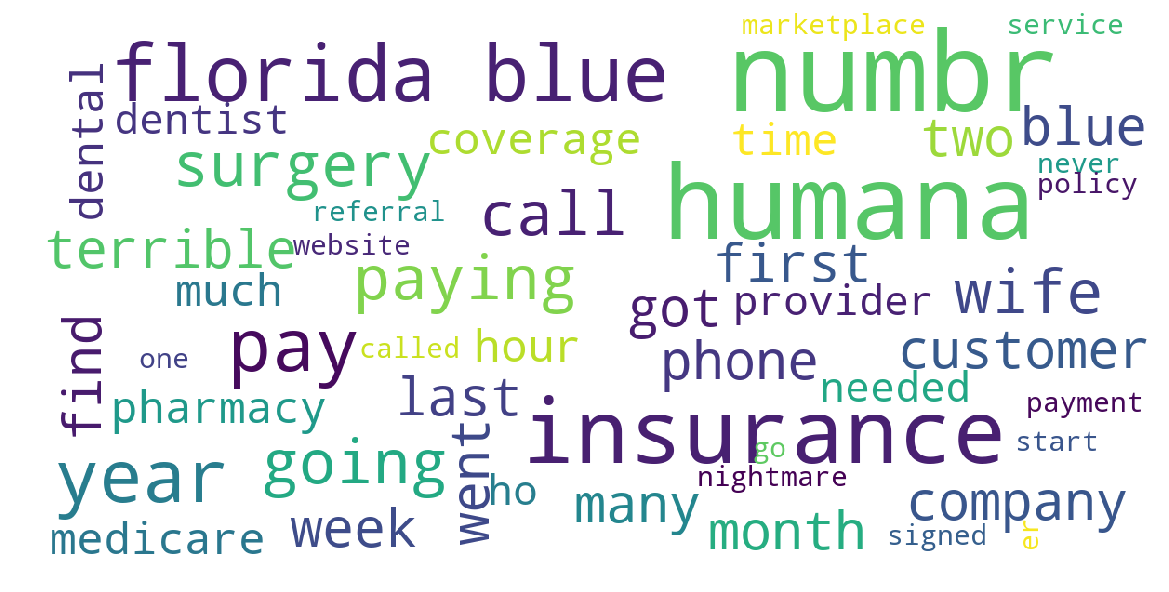

In [27]:
from wordcloud import WordCloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 50,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(final["Reviews"])

In [28]:
# highest positive sentiment reviews (with more than 5 words)
print(final[final["word_count"] >= 5].sort_values("pos", ascending = False)[["Reviews", "pos"]].head(5))
# lowest negative sentiment reviews (with more than 5 words)
print(final[final["word_count"] >= 5].sort_values("neg", ascending = False)[["Reviews", "neg"]].head(5))

                                               Reviews    pos
679  united health care proactive come making sure ...  0.596
670  using united health care ten year never proble...  0.596
437  happy united health aarp wish change wife cove...  0.588
166  great customer service pleasant willing listen...  0.583
204  humana good probably better united health care...  0.571
                                                Reviews    neg
362   diagnosed lynch syndrome uterine cancer numbr ...  0.542
163   hated insurance company never wanted help pers...  0.518
704   nerve damage diabetes numbr yr covered pain me...  0.516
1093  hurt spine something home bedridden complete a...  0.501
464   social security disability long time people tr...  0.473


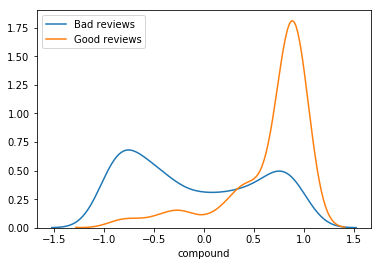

In [29]:
# plot sentiment distribution for positive and negative reviews

for x in [0, 1]:
    subset = final[final['Rating'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Bad reviews"
    else:
        label = "Good reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

The above graph shows the distribution of the reviews sentiments among good reviews and bad ones. We can see that good reviews are for most of them considered as very positive by Vader. On the contrary, bad reviews tend to have lower compound sentiment scores

## Modelling 

In [30]:
# feature selection
label = "Rating"
ignore_cols = [label, "Reviews","Company"]
features = [c for c in final.columns if c not in ignore_cols]
print(features[0:15])
print(len(features))
# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final[features], final[label], test_size = 0.20, random_state = 42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

['neg', 'neu', 'pos', 'compound', 'word_count', 'char_count', 'doc2vec_vector_0', 'doc2vec_vector_1', 'doc2vec_vector_2', 'doc2vec_vector_3', 'doc2vec_vector_4', 'word_aarp', 'word_able', 'word_absolutely', 'word_accept']
799
X_train:  (778, 799)
X_test:  (195, 799)
y_train:  (778,)
y_test:  (195,)


In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Train a random forest classifier
rf= RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
# Make predictions on the test dataset
pred = rf.predict(X_test)
# Acuuracy Score and Classification report
print("Accuracy:", accuracy_score(y_test, pred)*100, "%")
print()
print("Classification Report:\n",classification_report(y_test, pred))
print("Confusion Matrix is:\n", confusion_matrix(y_test,pred))

Accuracy: 94.87179487179486 %

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       180
           1       0.86      0.40      0.55        15

   micro avg       0.95      0.95      0.95       195
   macro avg       0.90      0.70      0.76       195
weighted avg       0.94      0.95      0.94       195

Confusion Matrix is:
 [[179   1]
 [  9   6]]


In [32]:
from sklearn.svm import SVC
from sklearn import svm
svmc=svm.SVC()
svmc.fit(X_train,y_train)
pred_svmc=svmc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred)*100, "%")
print("Classification Report:\n",classification_report(y_test,pred_svmc))   # y_test v/s pred_svmc
print("Confusion Matrix is:\n", confusion_matrix(y_test,pred_svmc))

C:\Users\NAKUL LAKHOTIA\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 94.87179487179486 %
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       180
           1       0.60      0.20      0.30        15

   micro avg       0.93      0.93      0.93       195
   macro avg       0.77      0.59      0.63       195
weighted avg       0.91      0.93      0.91       195

Confusion Matrix is:
 [[178   2]
 [ 12   3]]


out of 180 actual instances of 'not positive' ,it predicted correctly 178 of them


out of 15 actual instances of 'positive' , it predicted correctly 3 of them

out of 195 ratings , the classifier predicted correctly 181 of them

In [33]:
from sklearn.neural_network import MLPClassifier
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred)*100, "%")
print("Classification Report:\n",classification_report(y_test,pred_mlpc))   # y_test v/s pred_rfc
print("Confusion Matrix is:\n", confusion_matrix(y_test,pred_mlpc))
cm = confusion_matrix(y_test,pred_mlpc)
#accuracy may be obtained from the confusion matrix, as the sum of the diagonal divided by the sum of all matrix entries
(cm[0,0]+cm[1,1])/np.sum(cm)

Accuracy: 94.87179487179486 %
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       180
           1       0.75      0.40      0.52        15

   micro avg       0.94      0.94      0.94       195
   macro avg       0.85      0.69      0.75       195
weighted avg       0.94      0.94      0.94       195

Confusion Matrix is:
 [[178   2]
 [  9   6]]


0.9435897435897436

In [34]:
imp_features =rf.feature_importances_
print(imp_features[0:15])
print(len(imp_features))

[0.0176047  0.02387039 0.06101033 0.02656449 0.04029932 0.04446297
 0.01255158 0.01182039 0.0137122  0.00862943 0.01445672 0.00015761
 0.00122413 0.         0.0003078 ]
799


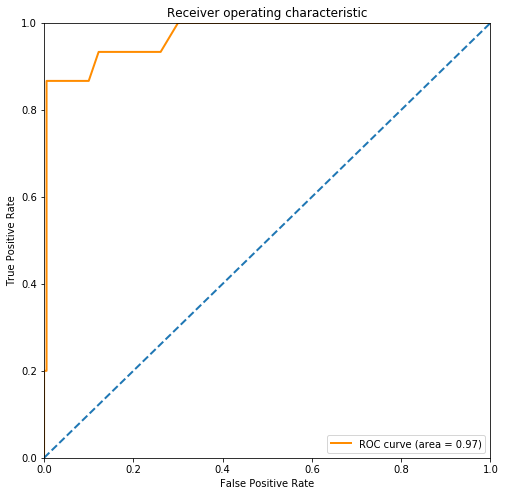

In [35]:
# ROC curve (Receiver Operating Characteristics)
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (8, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC (Receiver Operating Characteristic) curve is usually a good graph to summarize the quality of our classifier. The higher the curve is above the diagonal baseline, the better the predictions. Although the AUC ROC (Area Under the Curve ROC) is very good, we should not use here the ROC curve to assess the quality of our model.

Why? First let us remind the False Positive Rate formula, which corresponds to the x axis of the ROC curve: FPR (False Positive Rate) = # False Positives / # Negatives.

Here the # Negatives corresponds to our number of negative reviews which is very high because our dataset is imbalanced. This means that even with some False Positives, our FPR will tend to stay very low. Our model will be able to make a lot of false positives predictions and still have a low false positive rate, while increasing the true positive rate and therefore artificially increasing the AUC ROC metric.

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

An excellent model has AUC near to the 1 which means it has good measure of separability. A poor model has AUC near to the 0 which means it has worst measure of separability. In fact it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means model has no class separation capacity whatsoever.

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.83')

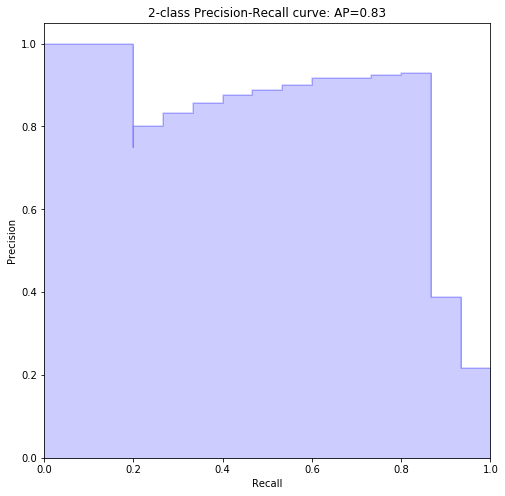

In [36]:
# PR curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.utils.fixes import signature

average_precision = average_precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (8, 8))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

A better metric in this imbalanced situation is the AUC PR (Area Under the Curve Precision Recall), or also called AP (Average Precision).

We can see that the precision decreases when we increase the recall after 0.7 . This shows us that we have to choose a prediction thresold adapted to our needs. If our goal is to have a high recall, we should set a low prediction thresold that will allow us to detect most of the observations of the positive class, but with a low precision. On the contrary, if we want to be really confident about our predictions but don’t mind about not finding all the positive observations, we should set a high thresold that will get us a high precision and a low recall.

In order to know if our model performs better than another classifier, we can simply use the AP metric. To assess the quality of our model, we can compare it to a simple decision baseline. Let’s take a random classifier as a baseline here that would predict half of the time 1 and half of the time 0 for the label.

Such a classifier would have a precision of 4.3%, which corresponds to the proportion of positive observations. For every recall value the precision would stay the same, and this would lead us to an AP of 0.043. The AP of our model is approximately 0.82, which is more than 19 times higher than the AP of the random method. This means that our model has a good predictive power.

In [37]:
positive_review = dataset['Reviews'][679]
positive_review

'United Health Care is very proactive when it comes to making sure its participants are getting an annual physical and annual tests such as a mammogram. They also will do an in home health check for free! I am extremely pleased with United Health Care.'

In [38]:
negative_review = dataset['Reviews'][362]
negative_review

'Diagnosed with Lynch Syndrome after having uterine cancer. I am at 4 times the risk for breast cancer. After thinking I might feel a lump they denied the MRI suggested by my doctor since I have dense breasts. When they told BCBS of IL I was at risk for breast cancer they said, "Well she\'s at risk for many cancers!" Denied.'

In [39]:
# highest positive sentiment reviews (with more than 5 words)
highest=final[final["word_count"] >= 5].sort_values("pos", ascending = False)[["Reviews", "pos","neg","compound","Company"]]
# highest negative sentiment reviews (with more than 5 words)
lowest=final[final["word_count"] >= 5].sort_values("neg", ascending = False)[["Reviews","pos" ,"neg","compound","Company"]]
print(type(highest))
print(type(lowest))
print(type(highest['compound']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [40]:
print(highest.head())
print(lowest.head())

                                               Reviews    pos    neg  \
679  united health care proactive come making sure ...  0.596  0.000   
670  using united health care ten year never proble...  0.596  0.093   
437  happy united health aarp wish change wife cove...  0.588  0.069   
166  great customer service pleasant willing listen...  0.583  0.000   
204  humana good probably better united health care...  0.571  0.173   

     compound             Company  
679    0.9705  United Health Care  
670    0.8990  United Health Care  
437    0.8910  United Health Care  
166    0.9595              Humana  
204    0.9081              Humana  
                                                Reviews    pos    neg  \
362   diagnosed lynch syndrome uterine cancer numbr ...  0.038  0.542   
163   hated insurance company never wanted help pers...  0.090  0.518   
704   nerve damage diabetes numbr yr covered pain me...  0.055  0.516   
1093  hurt spine something home bedridden complete a...  0.

In [41]:
highest.describe(include="all")

,Reviews,pos,neg,compound,Company
count,970,970.000000,970.000000,970.000000,970
unique,970,NaN,NaN,NaN,4
top,problem problem insurance since january everyt...,NaN,NaN,NaN,United Health Care
freq,1,NaN,NaN,NaN,397
mean,NaN,0.140051,0.135976,-0.036254,NaN
std,NaN,0.110219,0.095103,0.669828,NaN
min,NaN,0.000000,0.000000,-0.988400,NaN
25%,NaN,0.065000,0.066000,-0.679325,NaN
50%,NaN,0.117000,0.124000,-0.128000,NaN
75%,NaN,0.190000,0.193750,0.659700,NaN


In [42]:
# Dataframe for positive reviews
positive=highest[highest['compound'] > 0.8]
positive=positive[positive.neg == 0]
positive=positive.sort_values("compound", ascending = False)
print(positive['Company'].value_counts())

United Health Care    22
Humana                15
BCBS Florida           4
BCBS Illinois          3
Name: Company, dtype: int64


In [43]:
# Dataframe for negative reviews
negative=lowest[lowest['compound'] < -0.8]
negative=negative[negative.pos ==0]
negative=negative.sort_values("compound", ascending = False)
print(negative['Company'].value_counts())

BCBS Florida          10
United Health Care     9
Humana                 7
BCBS Illinois          4
Name: Company, dtype: int64


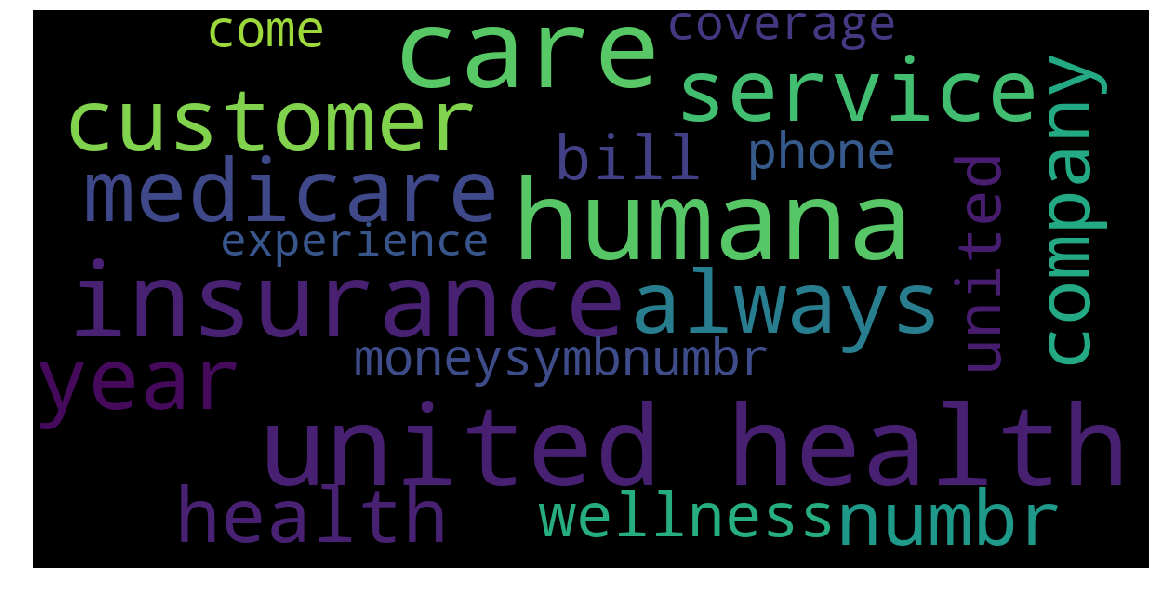

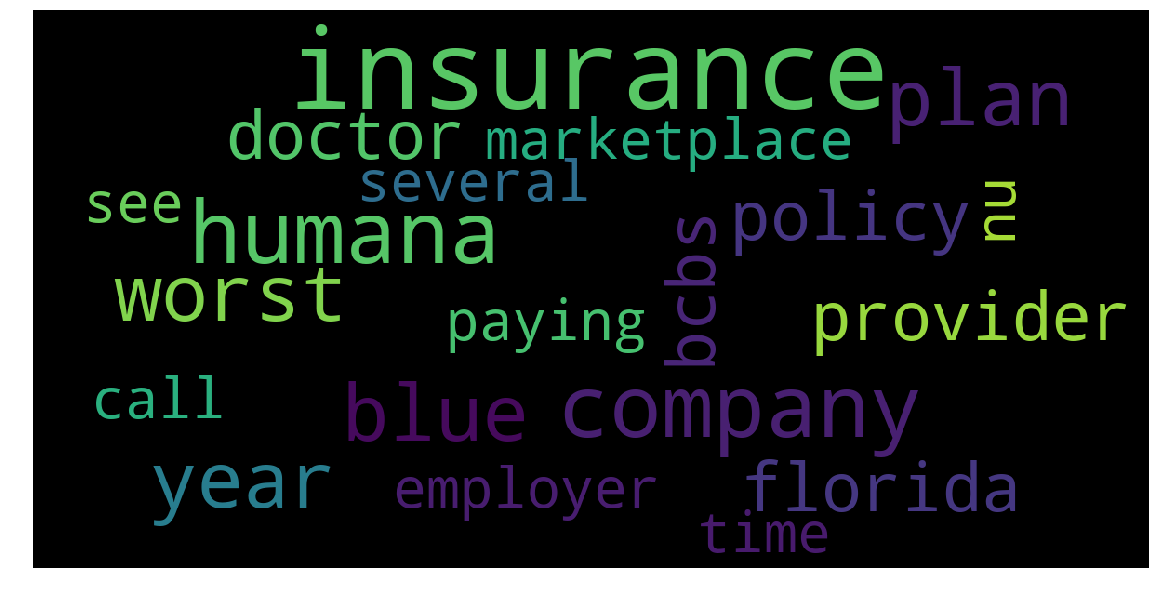

In [44]:
from wordcloud import WordCloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 20,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(positive["Reviews"])
show_wordcloud(negative["Reviews"])

In [45]:
# Dataframe for highly positive reviews
high_pos=positive[positive['compound'] > 0.95]
high_pos=high_pos[high_pos.neg == 0]
high_pos=high_pos.sort_values("compound", ascending = False)
print(high_pos)
print(high_pos['Company'].value_counts())

                                                Reviews    pos  neg  compound  \
472   united health care provides wellness care free...  0.511  0.0    0.9839   
806   received bill moneysymbnumbr united health car...  0.479  0.0    0.9823   
936   insurance picked via market place previous ins...  0.312  0.0    0.9735   
679   united health care proactive come making sure ...  0.596  0.0    0.9705   
726   rather large health bill year always paid ques...  0.437  0.0    0.9702   
226   humana sends phone book coverage information p...  0.332  0.0    0.9654   
655   overall excellent experience always ask questi...  0.441  0.0    0.9612   
1040  today get yearly rate increase moneysymbnumbr ...  0.440  0.0    0.9607   
166   great customer service pleasant willing listen...  0.583  0.0    0.9595   
769   began medicare due disability united health ca...  0.525  0.0    0.9578   
1024  get question answered wellness preventative me...  0.331  0.0    0.9571   
861   purchased best dental 

In [46]:
# Dataframe for highly negative reviews
high_neg=negative[negative['compound'] < 0.95]
high_neg=high_neg[high_neg.pos == 0]
high_neg=high_neg.sort_values("compound", ascending = True)
print(high_neg)
print(high_neg['Company'].value_counts())

                                                Reviews  pos    neg  compound  \
623   rn started severe disabling knee lower extremi...  0.0  0.254   -0.9756   
229   would go insurance company son emergency appen...  0.0  0.316   -0.9573   
651   company awful every month stop covering prescr...  0.0  0.423   -0.9540   
227   humana agent said transition humana would seam...  0.0  0.299   -0.9517   
895   called florida blue several time regarding iss...  0.0  0.173   -0.9403   
62    worst insurance ever half customer service rep...  0.0  0.215   -0.9371   
837   worst company ever total scam executive jail p...  0.0  0.444   -0.9217   
777   husband suffered prostate cancer cancer doctor...  0.0  0.316   -0.9186   
952   sold plan current year check see doctor plan e...  0.0  0.271   -0.9186   
1110  florida blue member since numbr prior aca go b...  0.0  0.201   -0.9062   
757   constant runaround prior authorization claimin...  0.0  0.291   -0.9062   
505   current insurance prov

In [47]:
print(high_pos.index)
for i in high_pos.index:
    print(i,dataset['Company'][i],":",dataset['Reviews'][i],"\n")

Int64Index([472, 806, 936, 679, 726, 226, 655, 1040, 166, 769, 1024, 861, 162,
            676],
           dtype='int64')
472 United Health Care : United Health Care provides me with wellness care (free wellness checkup with my PCP) and allows me to exercise at the gym as a part of the plan. This is a great advantage of this plan. They keep me informed with a health newsletter, mailings and through my billing statements letting me know whether service has been paid for. Lastly, UHC has an excellent mail order pharmacy that saves me a lot of money on my prescriptions. 

806 United Health Care : I just received a bill for $71 from United Health Care. I haven't had United Health Care since 2016. I even received a letter in 2016 letting me know that United Health Care was withdrawing from the healthcare Exchange. When I had United Health Care I opted for no subsidy because my income changes. And I didn't want to bill from the government at the end of the year. So far I haven't been able t

In [48]:
print(high_neg.index)
for i in high_neg.index[:15]:
    print(i,dataset['Company'][i],":",dataset['Reviews'][i],"\n")

Int64Index([ 623,  229,  651,  227,  895,   62,  837,  777,  952, 1110,  757,
             505,  842,  377,  550,  928,  930, 1037, 1007,  302,  129,  991,
             893,  537,  220,  304,  383, 1021,  109,  122],
           dtype='int64')
623 United Health Care : I'm an RN and started having severe, disabling, knee and lower extremity bone pain. I took 2 weeks off administering conservative home treatment and finally had to go to the physician. Xray was negative. MRI was ordered by doc and denied by UHC because of "lack of medical necessity". 4 weeks of Physical therapy is required by UHC before they will consider an MRI and since I was unable to walk, I was unable to do therapy. I was also very concerned about doing additional knee damage without the guidance of diagnostics. After 8 weeks, multiple phone calls, and a steroid injection, I'm still limping around, trying to keep working, taking meds to get me through each 12 hour shift, not knowing what the cause is. UHC has denied 2

BCBS Florida          10
United Health Care     9
Humana                 7
BCBS Illinois          4
Name: Company, dtype: int64


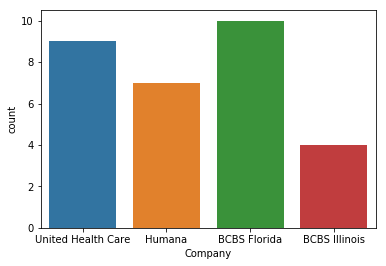

In [49]:
#Basic visualization of data using histograms
sns.countplot(data=high_neg, x = 'Company')
print(high_neg['Company'].value_counts())

United Health Care    8
Humana                3
BCBS Florida          3
Name: Company, dtype: int64


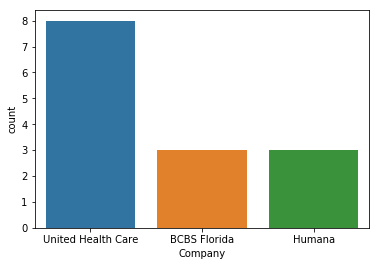

In [50]:
sns.countplot(data=high_pos, x = 'Company')
print(high_pos['Company'].value_counts())

In [51]:
# N-grams
from nltk.util import ngrams
for message in high_pos['Reviews'][:5]:
    print()
    words=word_tokenize(message)
    sen_ngrams_pos=list(ngrams(words,2))
    print(sen_ngrams_pos)


[('united', 'health'), ('health', 'care'), ('care', 'provides'), ('provides', 'wellness'), ('wellness', 'care'), ('care', 'free'), ('free', 'wellness'), ('wellness', 'checkup'), ('checkup', 'pcp'), ('pcp', 'allows'), ('allows', 'exercise'), ('exercise', 'gym'), ('gym', 'part'), ('part', 'plan'), ('plan', 'great'), ('great', 'advantage'), ('advantage', 'plan'), ('plan', 'keep'), ('keep', 'informed'), ('informed', 'health'), ('health', 'newsletter'), ('newsletter', 'mailing'), ('mailing', 'billing'), ('billing', 'statement'), ('statement', 'letting'), ('letting', 'know'), ('know', 'whether'), ('whether', 'service'), ('service', 'paid'), ('paid', 'lastly'), ('lastly', 'uhc'), ('uhc', 'excellent'), ('excellent', 'mail'), ('mail', 'order'), ('order', 'pharmacy'), ('pharmacy', 'save'), ('save', 'lot'), ('lot', 'money'), ('money', 'prescription')]

[('received', 'bill'), ('bill', 'moneysymbnumbr'), ('moneysymbnumbr', 'united'), ('united', 'health'), ('health', 'care'), ('care', 'united'), ('

In [52]:
from nltk.util import ngrams
for message in high_neg['Reviews'][:5]:
    print()
    words=word_tokenize(message)
    sen_ngrams_neg=list(ngrams(words,3))
    print(sen_ngrams_neg)


[('rn', 'started', 'severe'), ('started', 'severe', 'disabling'), ('severe', 'disabling', 'knee'), ('disabling', 'knee', 'lower'), ('knee', 'lower', 'extremity'), ('lower', 'extremity', 'bone'), ('extremity', 'bone', 'pain'), ('bone', 'pain', 'took'), ('pain', 'took', 'numbr'), ('took', 'numbr', 'week'), ('numbr', 'week', 'administering'), ('week', 'administering', 'conservative'), ('administering', 'conservative', 'home'), ('conservative', 'home', 'treatment'), ('home', 'treatment', 'finally'), ('treatment', 'finally', 'go'), ('finally', 'go', 'physician'), ('go', 'physician', 'xray'), ('physician', 'xray', 'negative'), ('xray', 'negative', 'mri'), ('negative', 'mri', 'ordered'), ('mri', 'ordered', 'doc'), ('ordered', 'doc', 'denied'), ('doc', 'denied', 'uhc'), ('denied', 'uhc', 'lack'), ('uhc', 'lack', 'medical'), ('lack', 'medical', 'necessity'), ('medical', 'necessity', 'numbr'), ('necessity', 'numbr', 'week'), ('numbr', 'week', 'physical'), ('week', 'physical', 'therapy'), ('phys

In [53]:
# function to plot most frequent terms
from nltk import FreqDist
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

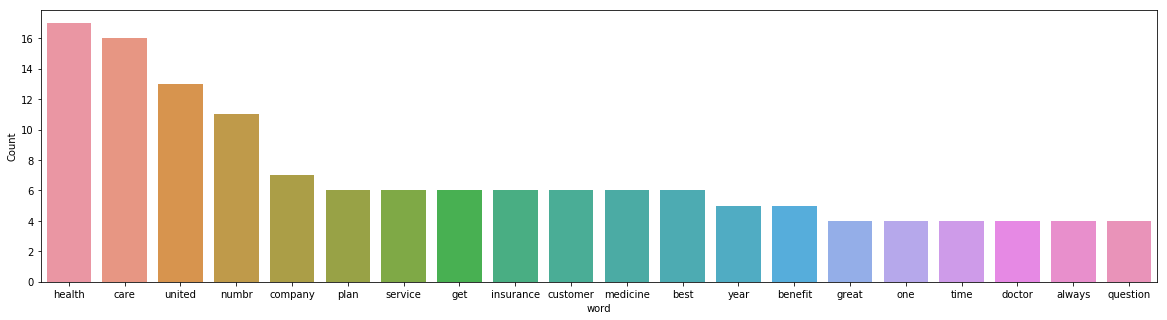

In [54]:
freq_words(high_pos['Reviews'], 20)

So we see the most frequent words in our positive reviews are numbr, heatlth , insurance , humana ,doctor etc.
But 'numbr' refers to any number present in the text and is not helpful,so we can remove this word from our positive reviews.

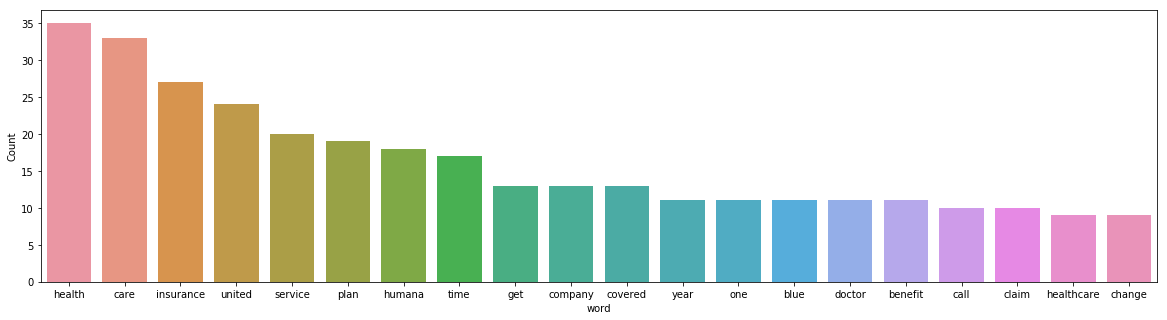

In [55]:
positive['Reviews'] = positive['Reviews'].apply(lambda x: ' '.join([w for w in x.split() if w!="numbr"]))
positive['Reviews'] = positive['Reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
freq_words(positive['Reviews'], 20)

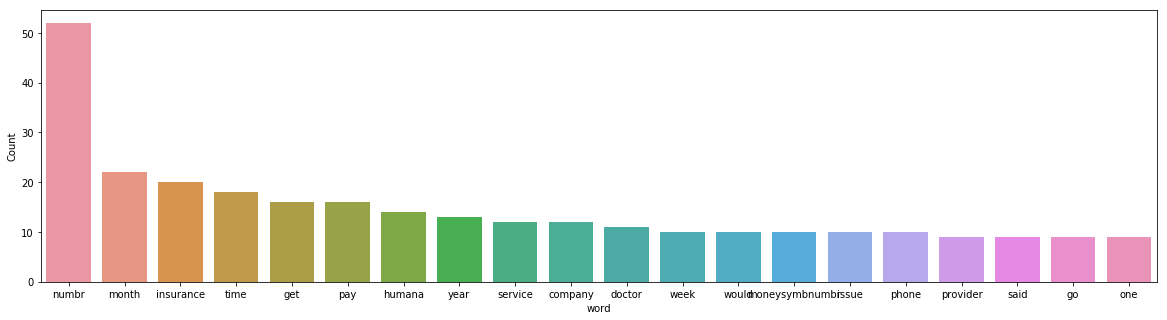

In [56]:
freq_words(negative['Reviews'], 20)

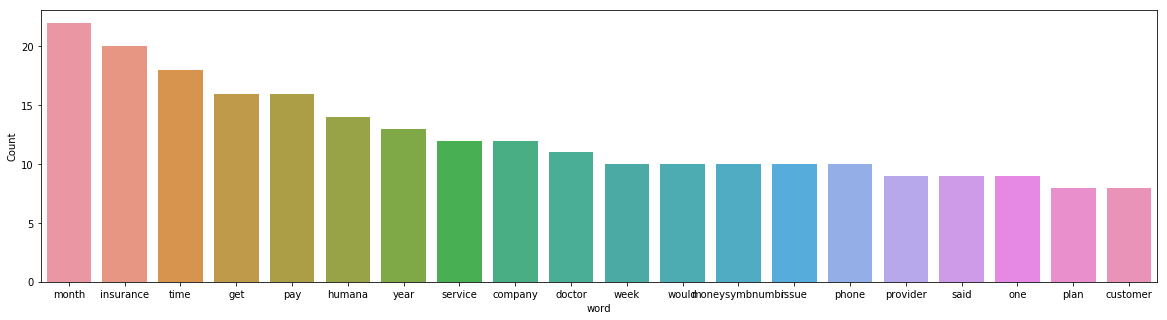

In [57]:
negative['Reviews'] = negative['Reviews'].apply(lambda x: ' '.join([w for w in x.split() if w!="numbr"]))
negative['Reviews'] = negative['Reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
freq_words(negative['Reviews'], 20)

In [63]:
reviews = [r for r in high_neg["Reviews"]]
print(reviews[:10])
reviews = pd.Series(reviews).apply(lambda x: x.split())

['rn started severe disabling knee lower extremity bone pain took numbr week administering conservative home treatment finally go physician xray negative mri ordered doc denied uhc lack medical necessity numbr week physical therapy required uhc consider mri since unable walk unable therapy also concerned additional knee damage without guidance diagnostics numbr week multiple phone call steroid injection still limping around trying keep working taking med get numbr hour shift knowing cause uhc denied numbr mri numbrnd ortho doc advises prior authorization physical therapy take numbr day', 'would go insurance company son emergency appendectomy numbr numbr numbr customer service horrible still trying get answer numbr numbr numbr nowhere united state go face face conversation get straightened crazy multiple issue answer one correct problem guess left getting lawyer looking see file grievance junk catastrophic insurance advice go humana', 'company awful every month stop covering prescriptio

In [64]:
import pyLDAvis

In [65]:
from gensim import corpora
import gensim
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)
%matplotlib inline


### Building an LDA Model

In [66]:
#We will start by creating the term dictionary of the corpus, where every unique term is assigned an index

dictionary = corpora.Dictionary(reviews)
#convert the list of reviews into a Document Term Matrix using the dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary,random_state=100,chunksize=1000, passes=50)

In [68]:
lda_model.print_topics(num_topics=10)

[(61,
  '0.001*"bcbs" + 0.001*"fl" + 0.001*"reliable" + 0.001*"remember" + 0.001*"trust" + 0.001*"access" + 0.001*"actually" + 0.001*"attempted" + 0.001*"aware" + 0.001*"placed"'),
 (0,
  '0.001*"bcbs" + 0.001*"fl" + 0.001*"reliable" + 0.001*"remember" + 0.001*"trust" + 0.001*"access" + 0.001*"actually" + 0.001*"attempted" + 0.001*"aware" + 0.001*"placed"'),
 (42,
  '0.086*"pill" + 0.064*"numbrmg" + 0.043*"size" + 0.043*"policy" + 0.043*"prescription" + 0.022*"irrational" + 0.022*"involved" + 0.022*"numbr" + 0.022*"instead" + 0.022*"cutting"'),
 (48,
  '0.001*"numbr" + 0.001*"bcbs" + 0.001*"claim" + 0.001*"patient" + 0.001*"get" + 0.001*"call" + 0.001*"comp" + 0.001*"numerous" + 0.001*"auto" + 0.001*"carrier"'),
 (87,
  '0.001*"bcbs" + 0.001*"fl" + 0.001*"reliable" + 0.001*"remember" + 0.001*"trust" + 0.001*"access" + 0.001*"actually" + 0.001*"attempted" + 0.001*"aware" + 0.001*"placed"'),
 (1,
  '0.080*"month" + 0.053*"prescription" + 0.053*"stop" + 0.053*"every" + 0.053*"company" + 0